# Cycle-by-cycle burst detection
In this notebook, we use neurodsp to determine the portions of a neural signal that contain oscillatory bursts.

To read about the algorithm, see [Cole & Voytek, 2018](https://www.biorxiv.org/content/early/2018/04/16/302000) or the [source code](https://github.com/voytekresearch/neurodsp/blob/master/neurodsp/shape/cyclefeatures.py#L199)

In [1]:
import numpy as np
import neurodsp
from neurodsp import shape

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt

### Simulate neural signal

Text(0.5,1,'Simulated signal')

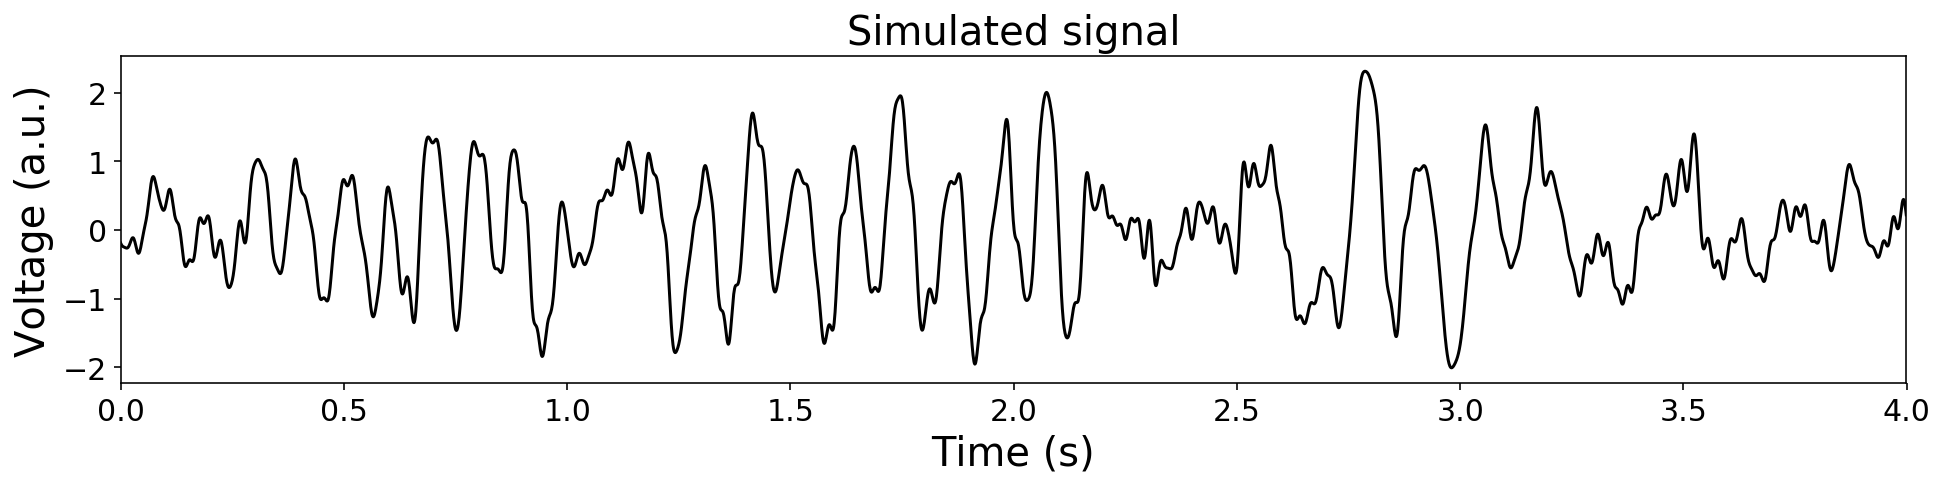

In [2]:
# Simulate brown noise + bursts
np.random.seed(100)
f_range = (8,12)
freq = 10
T = 4
Fs = 1000
SNR = 2
lfp = neurodsp.sim_noisy_bursty_oscillator(freq, T, Fs, SNR=SNR,
                                           prob_enter_burst = .15,
                                           prob_leave_burst = .2)

# Apply a broad bandpass filter, 1-50Hz
f_bandpass = (1, 50)
filter_seconds = (2, .3)
lfp = neurodsp.filter(lfp, Fs, 'highpass', fc=f_bandpass[0],
                      N_seconds=filter_seconds[0],
                      remove_edge_artifacts=False)
lfp = neurodsp.filter(lfp, Fs, 'lowpass', fc=f_bandpass[1],
                      N_seconds=filter_seconds[1],
                      remove_edge_artifacts=False)

# Plot lfp, oscillator, and brown noise components
t = np.arange(0, T, 1/Fs)

plt.figure(figsize=(16, 3))
plt.plot(t, lfp, 'k')
plt.xlim((t[0], t[-1]))
plt.yticks(size=15)
plt.xticks(size=15)
plt.ylabel('Voltage (a.u.)', size=20)
plt.xlabel('Time (s)', size=20)
plt.title('Simulated signal', size=20)

# Perform cycle-by-cycle analysis
* Includes burst detection and segmenting the signal into cycles and characterizing each cycle

In [3]:
# Define thresholds for burst detection
osc_kwargs = {'amplitude_fraction_threshold': 0,
              'amplitude_consistency_threshold': .4,
              'period_consistency_threshold': .6,
              'monotonicity_threshold': .8,
              'N_cycles_min': 3}

df = shape.features_by_cycle(lfp, Fs, f_range, center_extrema='T',
                             estimate_oscillating_periods=True,
                             estimate_oscillating_periods_kwargs=osc_kwargs)
df.head()

,band_amp,oscillator_amplitude,period,sample_last_peak,sample_next_peak,sample_trough,sample_zerox_rise,sample_zerox_decay,time_rise,time_trough,...,volt_trough,volt_ptsym,volt_rdsym,volt_decay,volt_peak,amp_fraction,amp_consistency,period_consistency,monotonicity,is_cycle
0,0.523497,0.523497,112,195,307,243,274,218,64,56,...,-0.839210,-0.632376,0.822117,1.046044,0.206834,0.290984,NaN,NaN,0.795677,False
1,0.750153,0.750153,84,307,391,357,375,334,34,41,...,-0.635910,0.393041,0.007428,1.664860,1.028951,0.470906,0.807055,0.661417,1.000000,True
2,0.844001,0.844001,127,391,518,462,479,429,56,50,...,-1.035710,0.000669,-0.240365,2.072089,1.036379,0.545404,0.807055,0.637795,0.875325,True
3,0.829852,0.829852,81,518,599,566,585,542,33,43,...,-1.265116,-0.469102,-0.168277,2.061129,0.796014,0.534173,0.888699,0.637795,1.000000,True
4,1.003139,1.003139,90,599,689,657,670,620,32,50,...,-1.350557,-0.722820,0.729165,1.978294,0.627737,0.671730,0.730683,0.882353,0.903509,True


# Visualize burst detection

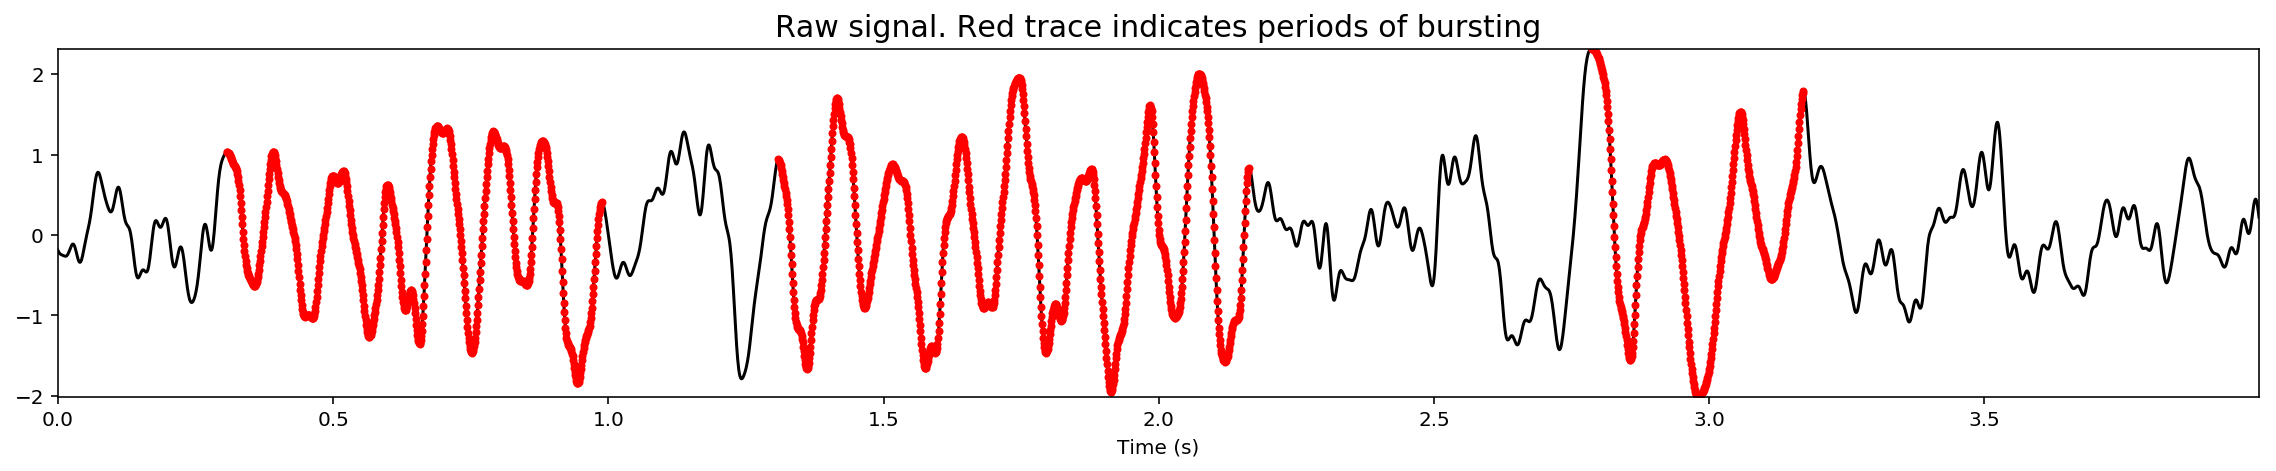

In [4]:
neurodsp.shape.plot_burst_detect_params(lfp, Fs, df, osc_kwargs, plot_only_result=True)

# Highlight algorithm choices in burst detection

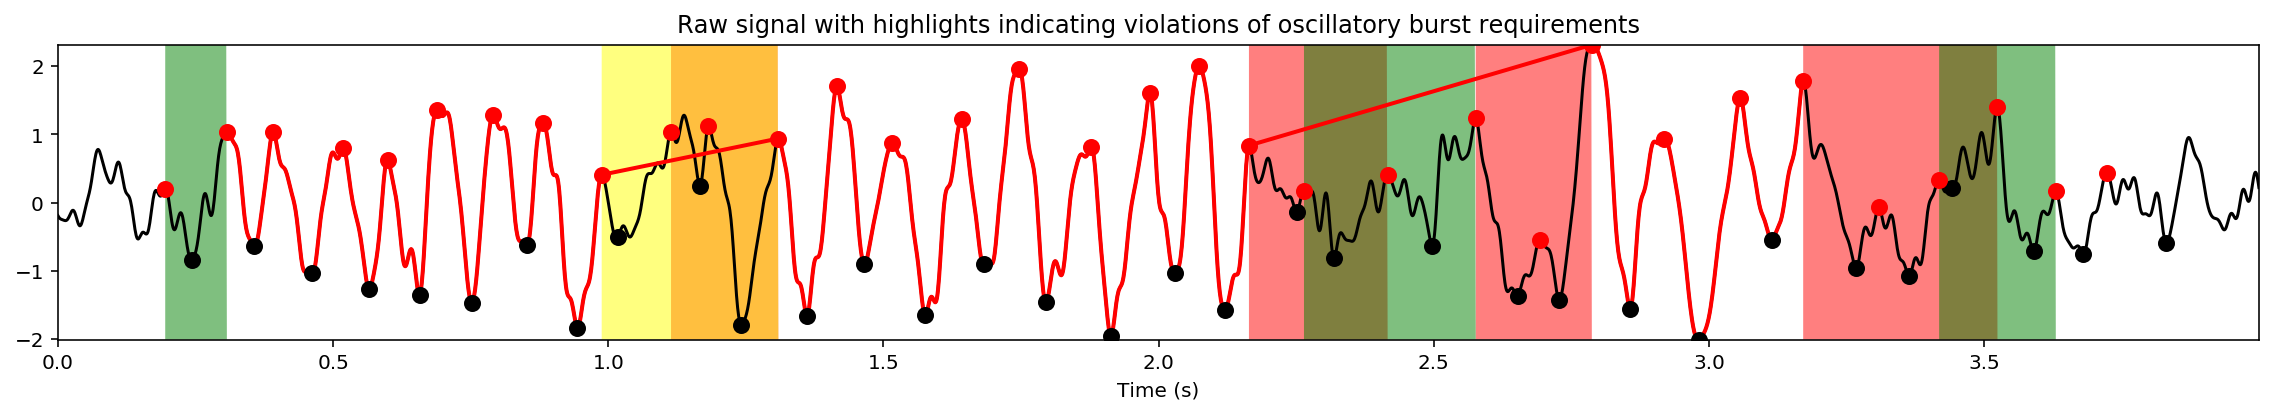

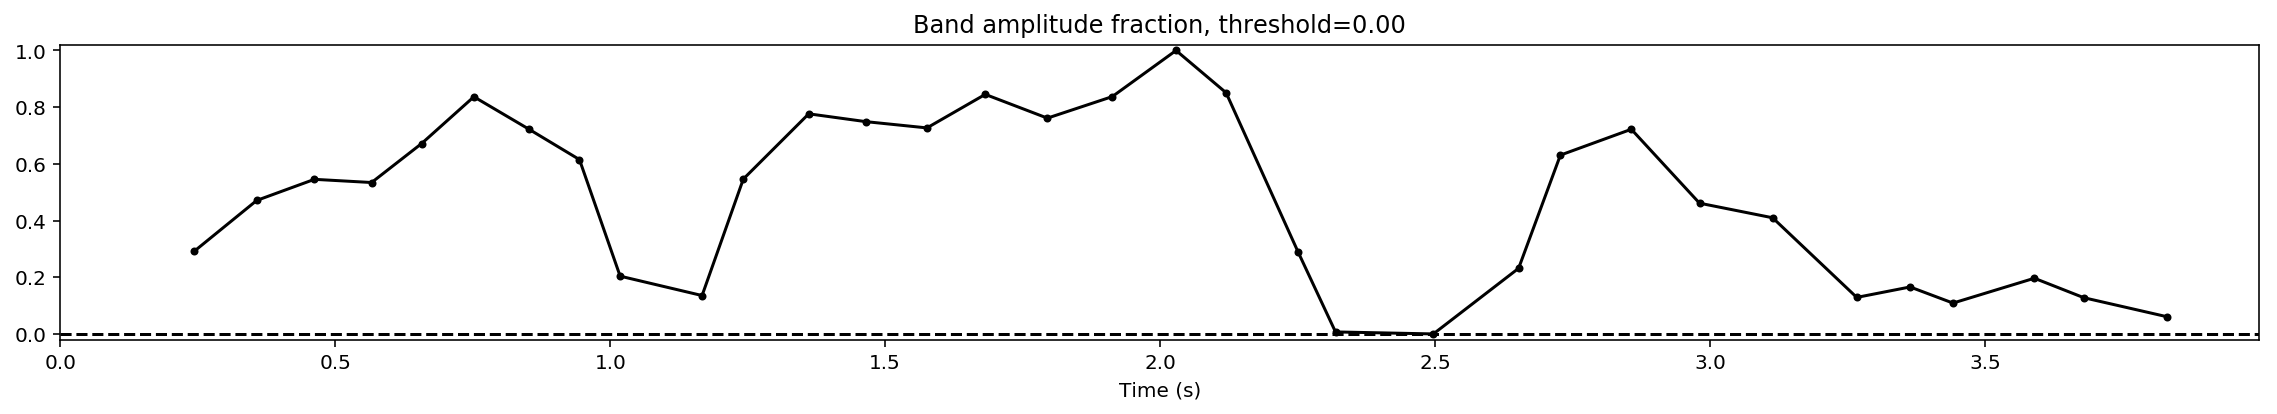

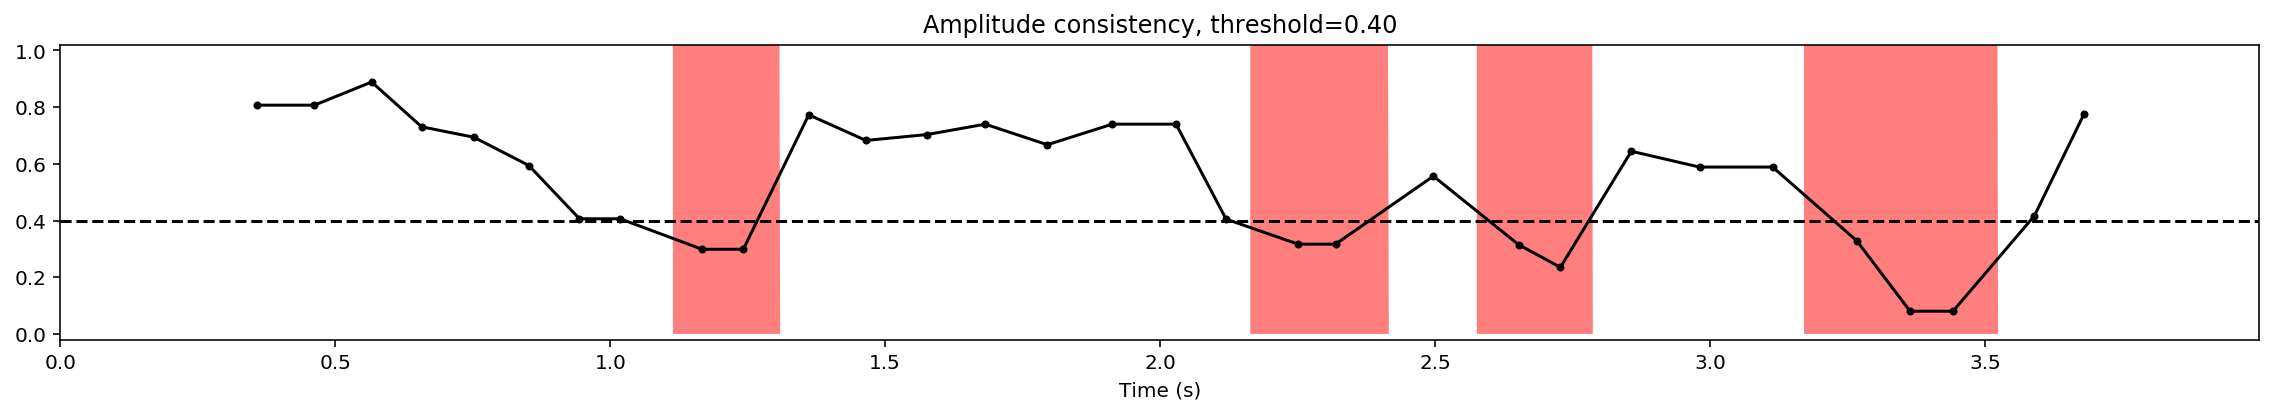

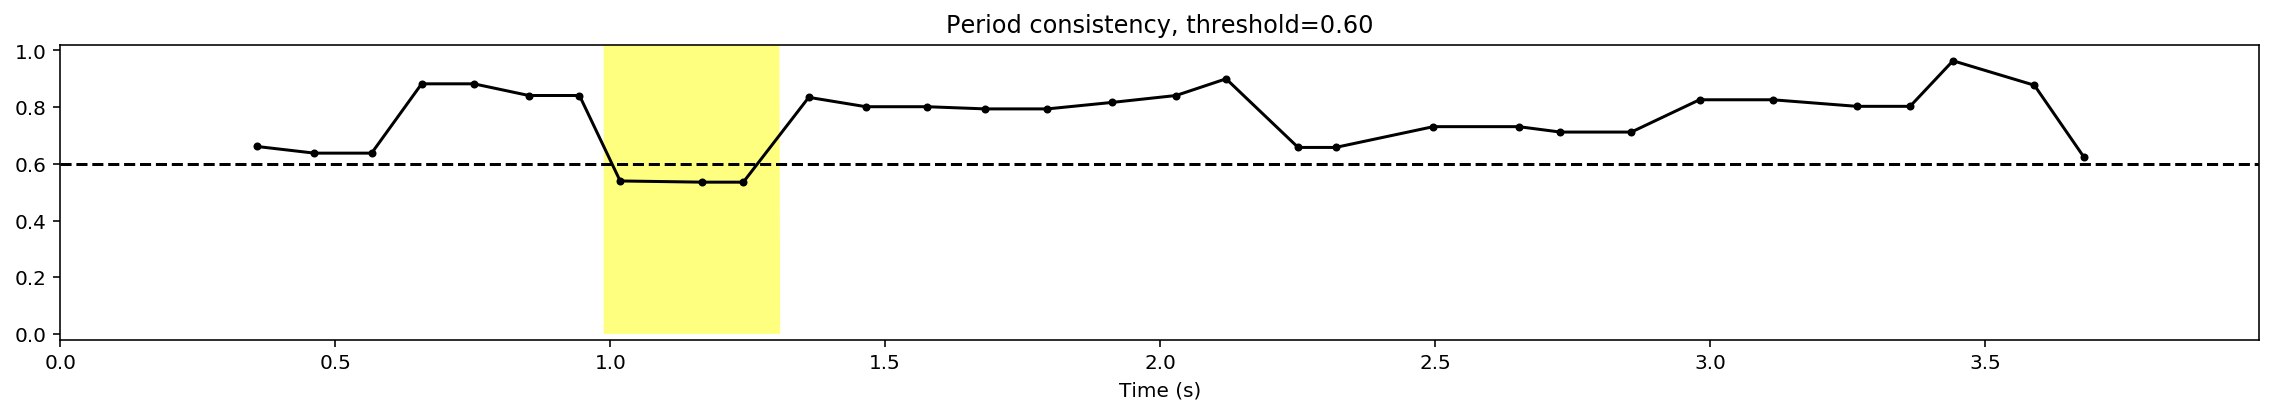

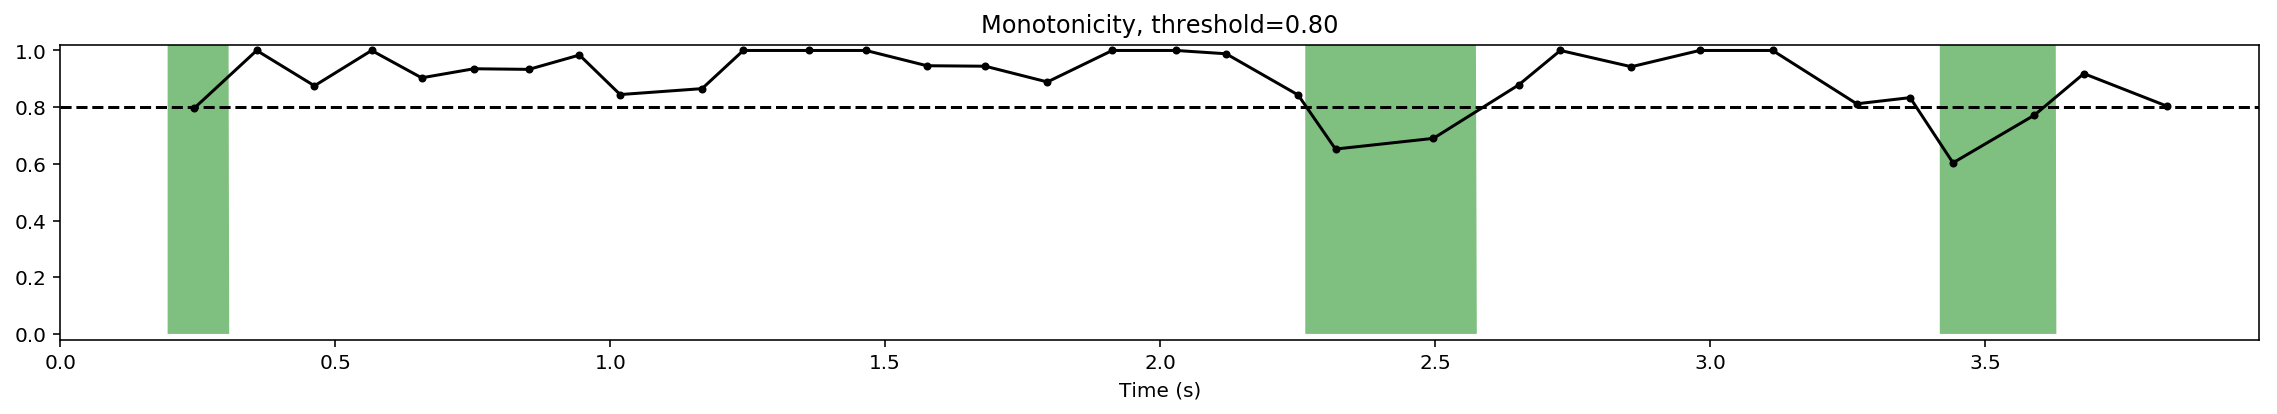

In [5]:
neurodsp.shape.plot_burst_detect_params(lfp, Fs, df, osc_kwargs)